# Installations

In [1]:

%%capture
#Functions
from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile

colors = [ "#E69F00", "#56B4E9", "#009E73", "#CC79A7", "#999999","#F0E442","#0072B2", "#D55E00" ]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.7, 
              rc={"lines.linewidth": 1.8, 'axes.linewidth':2, 
                                  "xtick.major.width":2,"ytick.major.width":2}, 
              palette = palette)




In [2]:

import Cyclic_peptide as cy

In [3]:
def process_data(ic, excel_name, sheet_name, k0_input, condition_id):
    df = cy.load_data_frame(excel_name, sheet_name)
    dfs, cond = cy.sort_condition(df)
    df1 = dfs[condition_id]
    initial_conditions, params, tspan = cy.load_initial_conditions(df1, k0_input)
    data = df1[['F', "Ac", "E1", "E2", "E3"]].values
    t = sorted(df1['time'])
    return initial_conditions, params, tspan, data, t, df1

def fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k, num_iterations=10):
    # Load data and preprocess
    initial_conditions, params, tspan, data, t,e = process_data(ic, excel_name, sheet_name, k0_input, condition_id)
    
    # Perform fitting
    for i in range(num_iterations):
        result = minimize(
            cy.error, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
        params.update(result.params)  # Update parameters in each iteration

    """# Perform final fitting using RMSEerror
    result = minimize(
        cy.RMSEerror, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
    params.update(result.params)  # Update parameters with final result"""
    
    # Extract parameter values
    k_values = pd.DataFrame({f"{name_k}": params.valuesdict().values()})
    
    simulated_data = cy.get_fitted_curve(ic, tspan = np.linspace(0, 2000, 10000), params = k_values.values.flatten())





    return k_values, e, simulated_data 

def fit_data_No_EDC(ic, excel_name, sheet_name, k0_input, condition_id, name_k, num_iterations=10):
    # Load data and preprocess
    initial_conditions, params, tspan, data, t,e = process_data(ic, excel_name, sheet_name, k0_input, condition_id)
    
    # Perform fitting
    for i in range(num_iterations):
        result = minimize(
            cy.error_no_EDC, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
        params.update(result.params)  # Update parameters in each iteration

    """# Perform final fitting using RMSEerror
    result = minimize(
        cy.RMSEerror, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
    params.update(result.params)  # Update parameters with final result"""
    
    # Extract parameter values
    k_values = pd.DataFrame({f"{name_k}": params.valuesdict().values()})
    
    simulated_data = cy.get_fitted_curve(ic, tspan = np.linspace(0, 2000, 10000), params = k_values.values.flatten())





    return k_values, e, simulated_data 

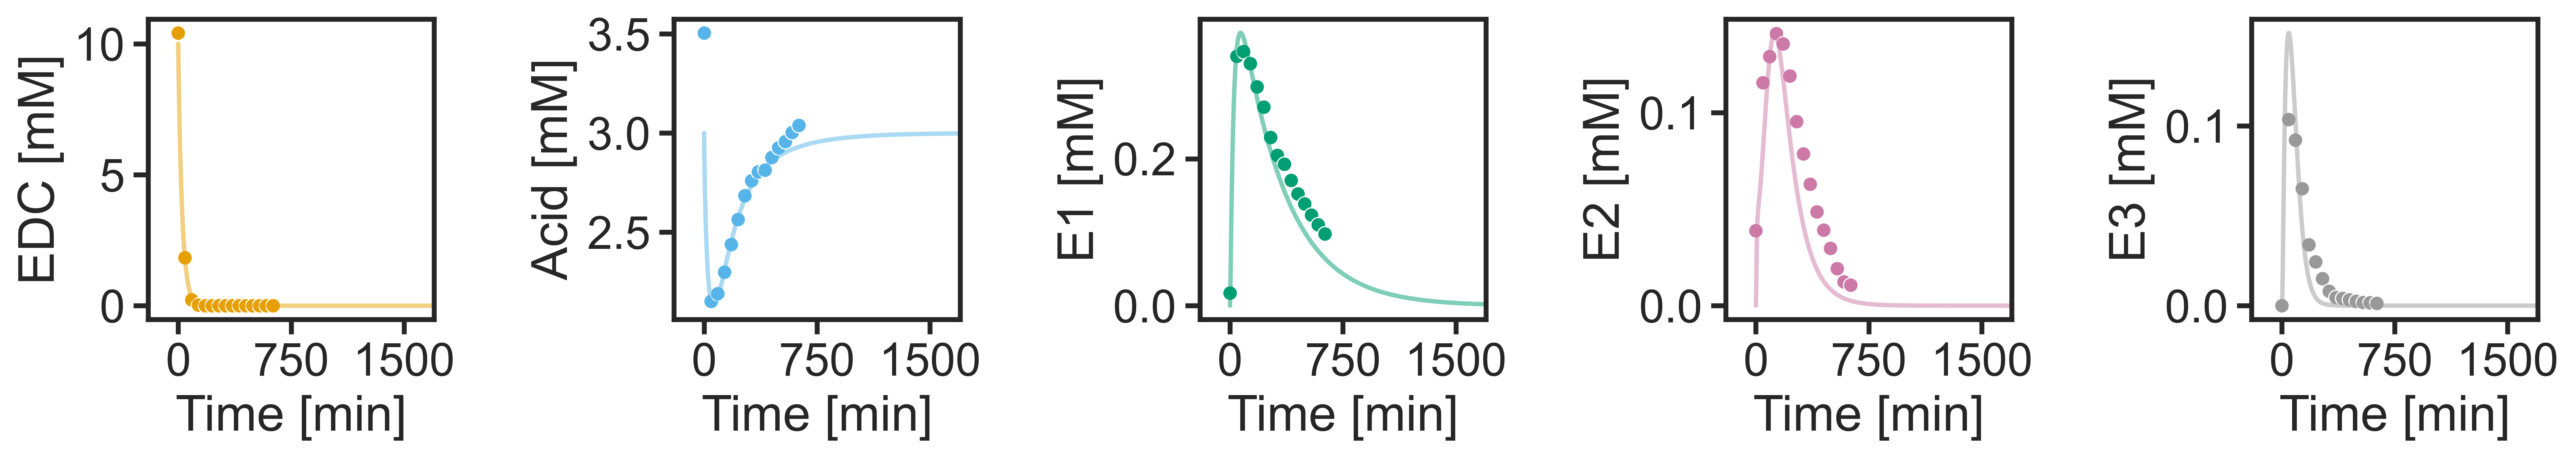

In [4]:
# 3 mM Acid and 10 mM EDC
ic = [10, 0, 3., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi"
sheet_name = "Sheet1"
k0_input = 0.0045
condition_id = 0
name_k = "Ac-AYRGD-OH_1"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic = [10,0,3., 0, 0,0,0,0], 
                                                          excel_name = "template_depsipeptides_Fabi", 
                                                          sheet_name = "Sheet1", 
                                                          k0_input = 0.0045, 
                                                          condition_id=0)

results1 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results1[1], results1[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

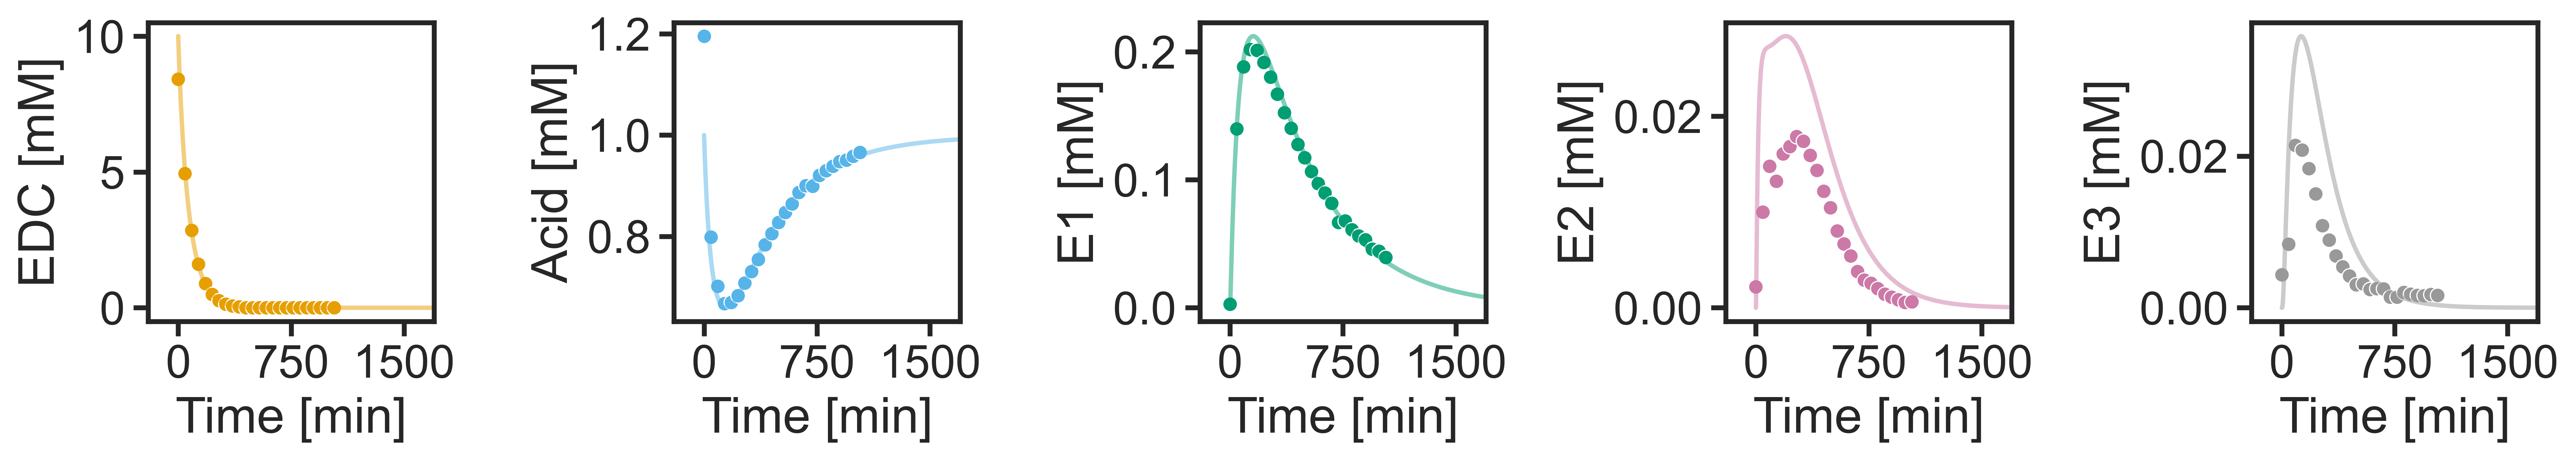

In [5]:
# 1 mM Acid and 10 mM EDC
ic = [10, 0, 1., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_1_10_Ac-AYRGD-OH"
sheet_name = "Sheet1"
k0_input = 0.0045
condition_id = 0
name_k = "Ac-AYRGD-OH_2"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results2 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results2[1], results2[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

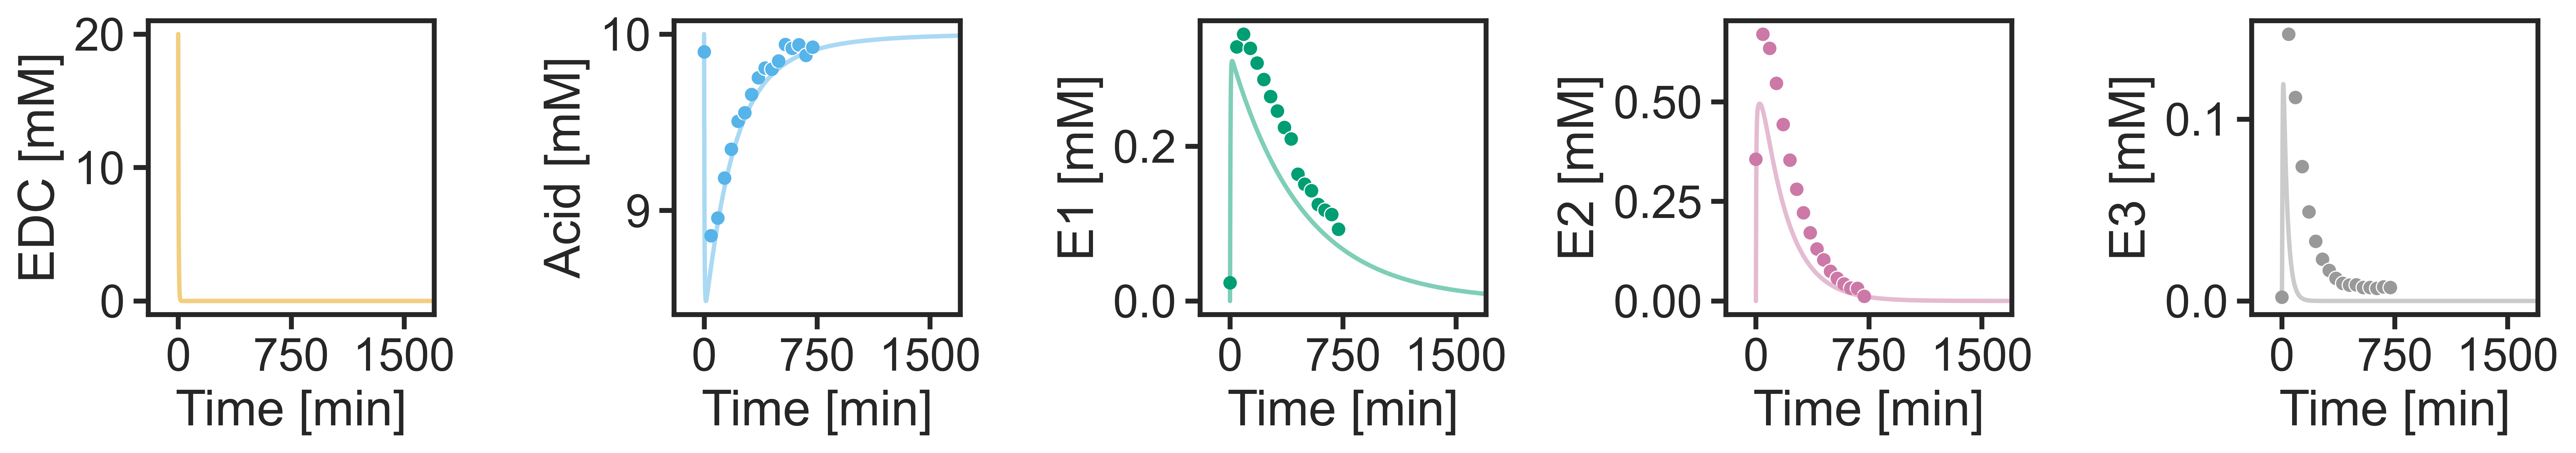

In [6]:
# 10 mM Acid and 20 mM EDC
ic = [20, 0, 10., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_10_20_Ac-AYRGD-OH"
sheet_name = "Sheet1"
k0_input = 0.0045
condition_id = 0
name_k = "Ac-AYRGD-OH_3"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results3 = fit_data_No_EDC(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results3[1], results3[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [8]:
k_values = pd.concat([results1[0], results2[0], results3[0]], axis = 1)
k_values.to_excel("k_values_Ac_AYRGD.xlsx")

In [9]:
names = ["00_10_3mM.xlsx","01_10_1mM.xlsx","02_20_10mM.xlsx"]
for i, j, n in zip([results1[1], results2[1], results3[1]], [results1[2], results2[2], results3[2]], names):

    i.to_excel(f"experimental_{n}")
    j.to_excel(f"simulated_{n}")

# "old"

In [ ]:
half_life = pd.DataFrame(np.log(2)/k_values.iloc[11:].values, columns=["Half-life"], index = ["E1", "E2", "E3"])
half_life

Half-life
E1  237.941761
E2   78.004692
E3   43.175736

In [ ]:
ic = [10,0,1., 0, 0,0,0,0]
excel_name = "template_depsipeptides_Fabi_1_10_Ac-AYRGD-OH" 
sheet_name = "Sheet1"
df = cy.load_data_frame(excel_name, sheet_name)
dfs, cond = cy.sort_condition(df)
k0s_input = [0.0045, 0.0045]
df2 = dfs[0]
initial_conditions, params, tspan = cy.load_initial_conditions(df2, k0s_input[0])
data = df2[['F', "Ac", "E1", "E2", "E3"]].values
t = sorted(df2['time'])
df2

/Users/hsc/Dropbox/09_Collaborations/01_From Fabi/00_KineticModel/Old/Ac-AYRGD-OH/Cyclic_peptide.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tspan = np.linspace(df["time"][0], float(df["time"].tail(1)) + 1000, 1000)


time         F        Ac        E1        E2        E3  Condition
0      0  8.420130  1.195532  0.002870  0.002201  0.004343          1
1     45  4.944540  0.798837  0.139694  0.010000  0.008392          1
2     90  2.856479  0.701771  0.188283  0.014775  0.021413          1
3    135  1.601908  0.667448  0.201719  0.013203  0.020812          1
4    180  0.890114  0.669786  0.201031  0.016062  0.018349          1
5    225  0.496226  0.683134  0.191644  0.016830  0.015017          1
6    270  0.261570  0.707824  0.180168  0.017861  0.010837          1
7    315  0.136849  0.730637  0.166819  0.017376  0.008929          1
8    360  0.071132  0.754611  0.152359  0.015902  0.006827          1
9    405  0.035530  0.783673  0.140212  0.014355  0.005406          1
10   450  0.000000  0.805676  0.127610  0.012176  0.004203          1
11   495  0.000000  0.827640  0.117201  0.010444  0.003056          1
12   540  0.000000  0.847193  0.106353  0.008020  0.003135          1
13   585  0.000000  0.863975  0.096994  0.006671  0.002422          1
14   630  0.000000  0.886902  0.089752  0.005413  0.002523          1
15   675  0.000000  0.900473  0.081653  0.003791  0.002504          1
16   720  0.000000  0.899063  0.066668  0.002896  0.001405          1
17   765  0.000000  0.920733  0.067840  0.002560  0.001415          1
18   810  0.000000  0.930080  0.060853  0.001997  0.002021          1
19   855  0.000000  0.938746  0.056228  0.001435  0.001800          1
20   900  0.000000  0.947776  0.053041  0.001113  0.001643          1
21   945  0.000000  0.950849  0.045857  0.000827  0.001619          1
22   990  0.000000  0.958281  0.044231  0.000556  0.001743          1
23  1035  0.000000  0.966172  0.039419  0.000624  0.001641          1

In [ ]:
for i in range(10):
    result = minimize(
        cy.error, params, args=(ic, t, data), nan_policy = "omit", method = "least_squares")
    # Actualizar los parámetros en cada iteración
    params.update(result.params)
result = minimize(
    cy.error, params, args=(ic, t, data), nan_policy = "omit", method = "nelder")
# Actualizar los parámetros en cada iteración
params.update(result.params)
k_values["Ac-AYRGD-OH_2"] = params.valuesdict().values()

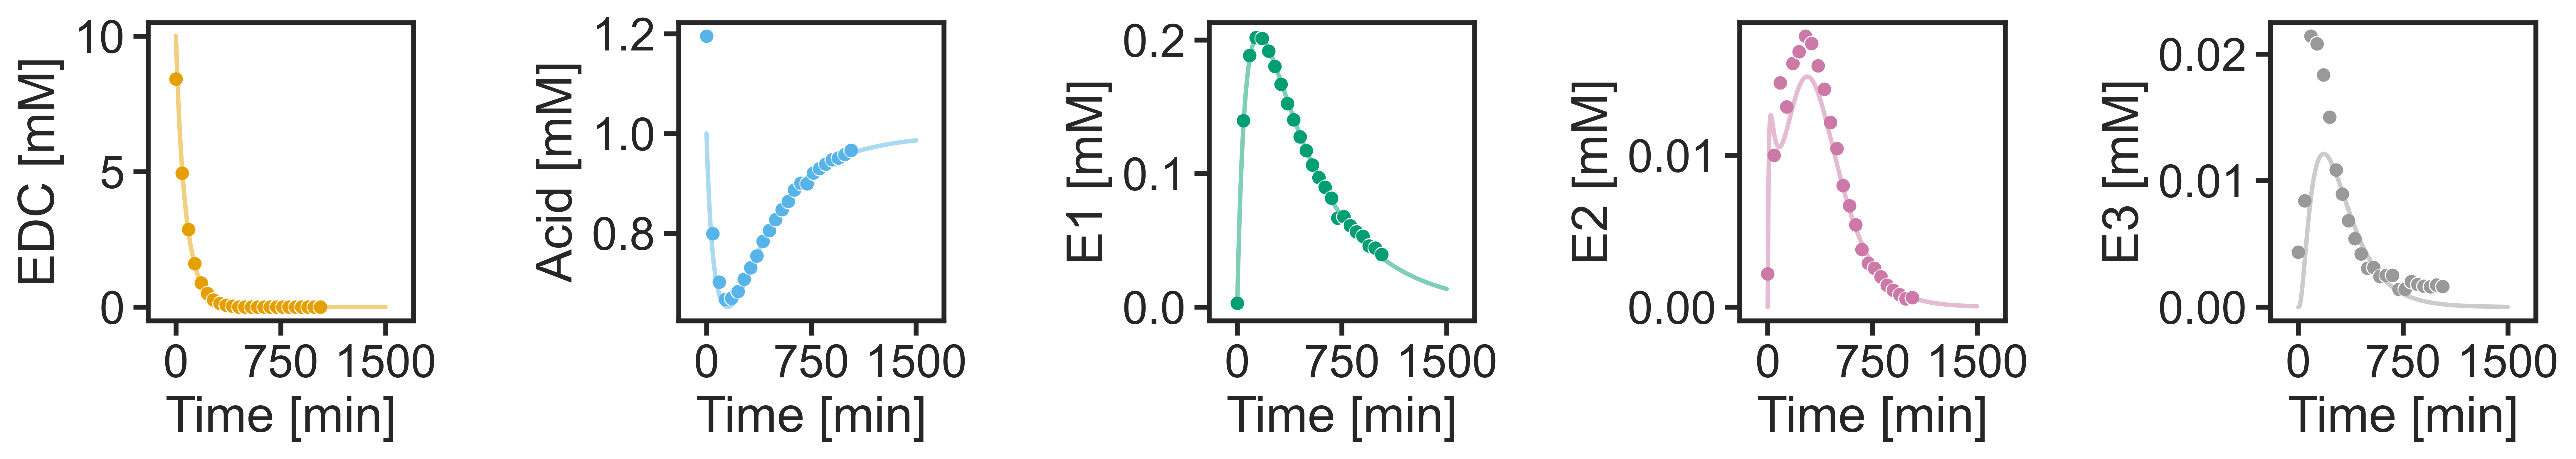

In [ ]:
y0 = cy.get_fitted_curve(ic, tspan = np.linspace(0, 1500, 10000), params = params.valuesdict().values())
fig, ax = cy.plot_fitted(df2, y0)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [ ]:
ic = [20,0,10., 0, 0,0,0,0]
excel_name = "template_depsipeptides_Fabi_10_20_Ac-AYRGD-OH" 
sheet_name = "Sheet1"
df = cy.load_data_frame(excel_name, sheet_name)
dfs, cond = cy.sort_condition(df)
k0s_input = [0.0045, 0.0045]
df3 = dfs[0]
initial_conditions, params, tspan = cy.load_initial_conditions(df3, k0s_input[0])
data = df3[['F', "Ac", "E1", "E2", "E3"]].values
t = sorted(df3['time'])

/Users/hsc/Dropbox/09_Collaborations/01_From Fabi/00_KineticModel/Old/Ac-AYRGD-OH/Cyclic_peptide.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tspan = np.linspace(df["time"][0], float(df["time"].tail(1)) + 1000, 1000)


In [ ]:
for i in range(10):
    result = minimize(
        cy.error, params, args=(ic, t, data), nan_policy = "omit", method = "least_squares")
    # Actualizar los parámetros en cada iteración
    params.update(result.params)
result = minimize(
    cy.error, params, args=(ic, t, data), nan_policy = "omit", method = "nelder")
# Actualizar los parámetros en cada iteración
params.update(result.params)
k_values["Ac-AYRGD-OH_3"] = params.valuesdict().values()

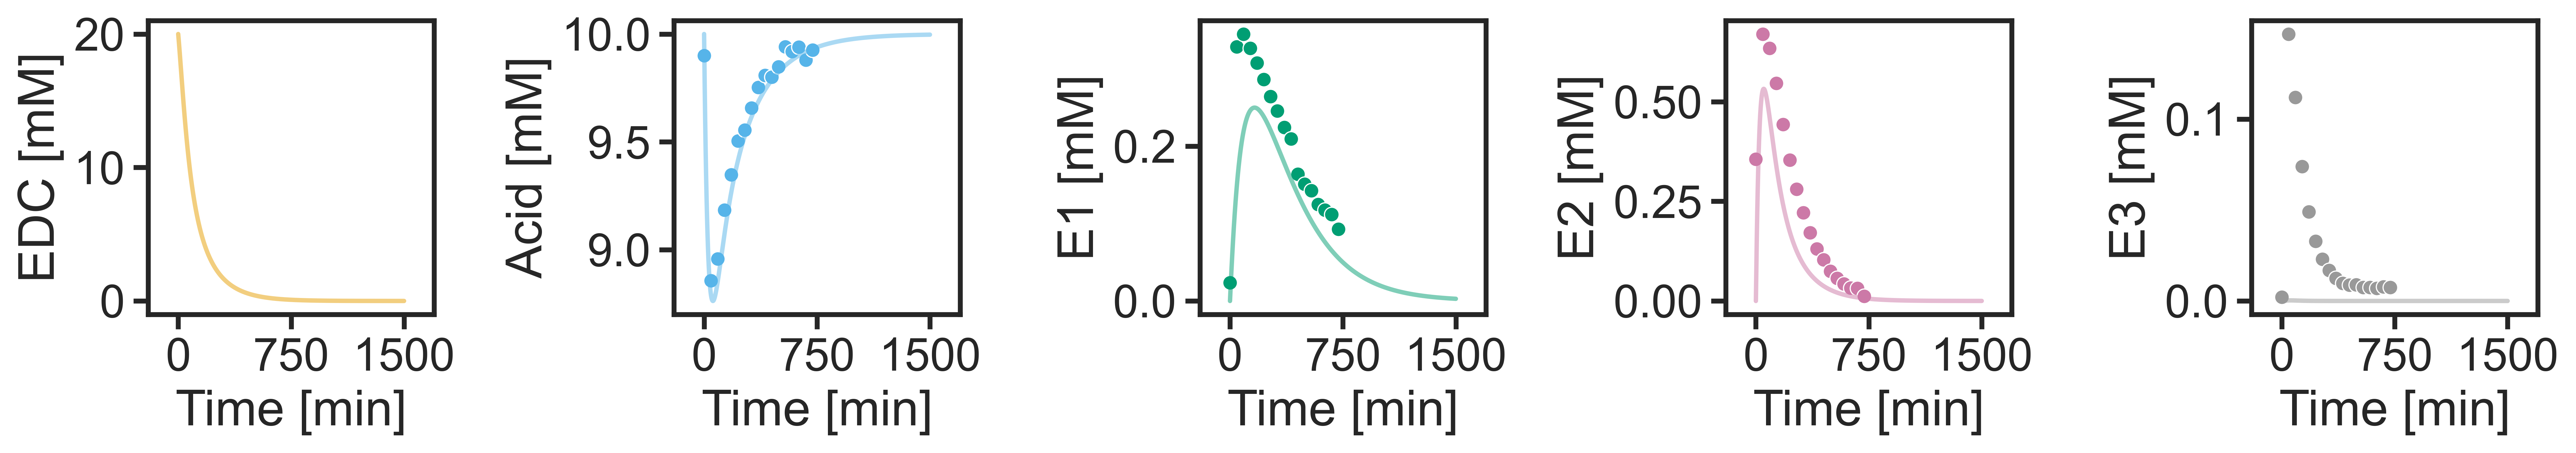

In [ ]:
y0 = cy.get_fitted_curve(ic, tspan = np.linspace(0, 1500, 10000), params = params.valuesdict().values())
fig, ax = cy.plot_fitted(df3, y0)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [ ]:
k_values

Ac-AYRGD-OH_1
0        0.004500
1        0.552623
2        0.058455
3        0.438609
4        0.824373
5        0.915166
6        0.278775
7        0.990907
8        0.947316
9        0.268349
10       0.023496
11       0.002913
12       0.008886
13       0.016054

In [ ]:
k_values

Ac-AYRGD-OH_1  Ac-AYRGD-OH_2  Ac-AYRGD-OH_3
0        0.004500       0.004500       0.004500
1        0.006260       0.012267       0.000185
2        0.045945       0.026438       0.791976
3        0.185735       0.409336       0.001530
4        0.026073       0.031583       0.404034
5        0.252989       0.689084       0.779497
6        0.071464       0.322060       0.536472
7        0.216857       0.012354       0.006898
8        0.050271       0.442869       0.000100
9        0.885680       0.000156       0.252828
10       0.677545       0.005436       0.291092
11       0.003260       0.002149       0.004016
12       0.008868       0.012763       0.030572
13       0.017176       0.020463       0.055448

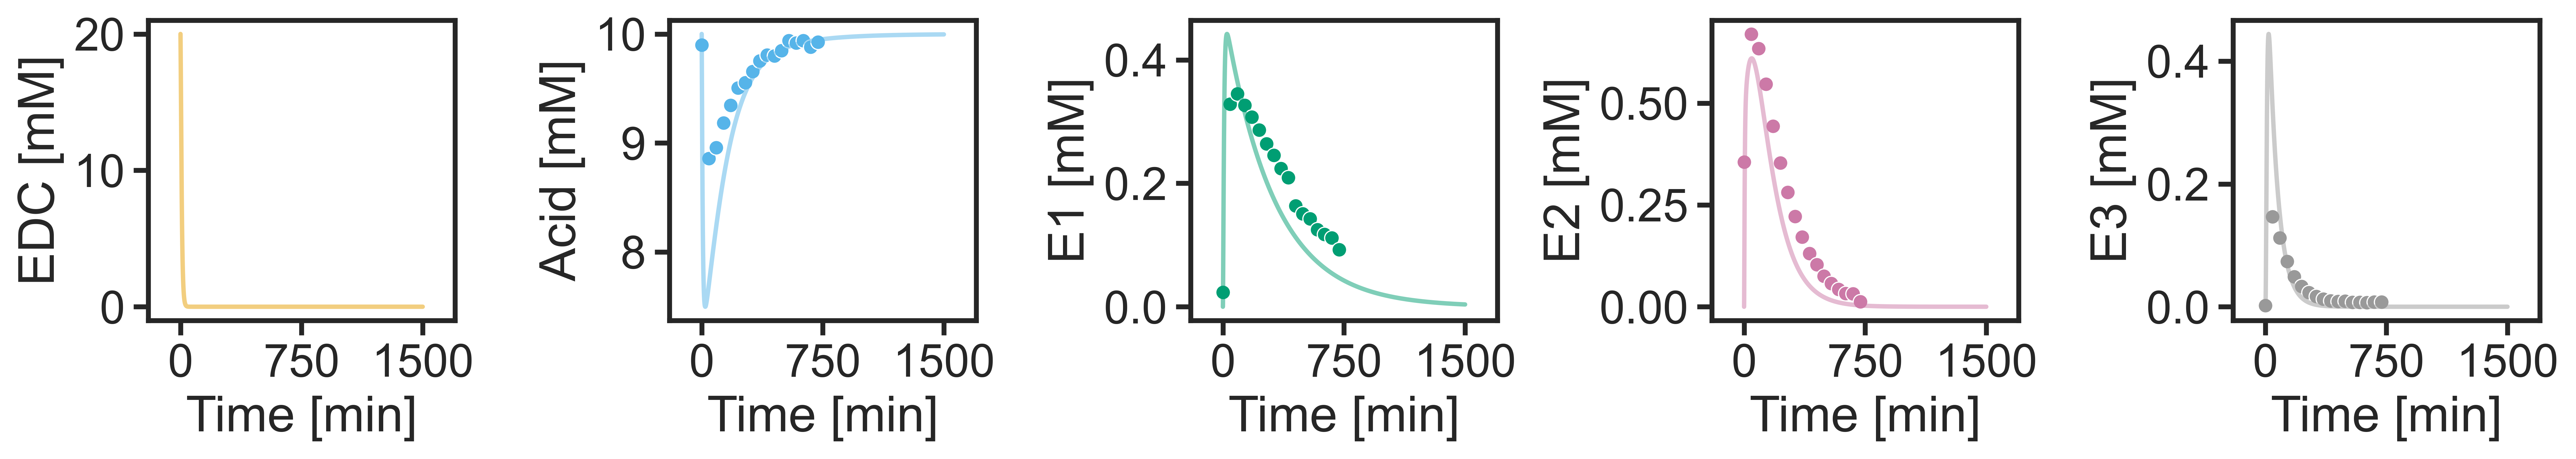

In [ ]:
y0 = cy.get_fitted_curve(ic, tspan = np.linspace(0, 1500, 10000), params = k_values["Ac-AYRGD-OH_1"])
fig, ax = cy.plot_fitted(df3, y0)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [ ]:
ic_1 = [10,0,3., 0, 0,0,0,0]
ic_2 = [10,0,1., 0, 0,0,0,0]
ic_3 = [20,0,10., 0, 0,0,0,0]


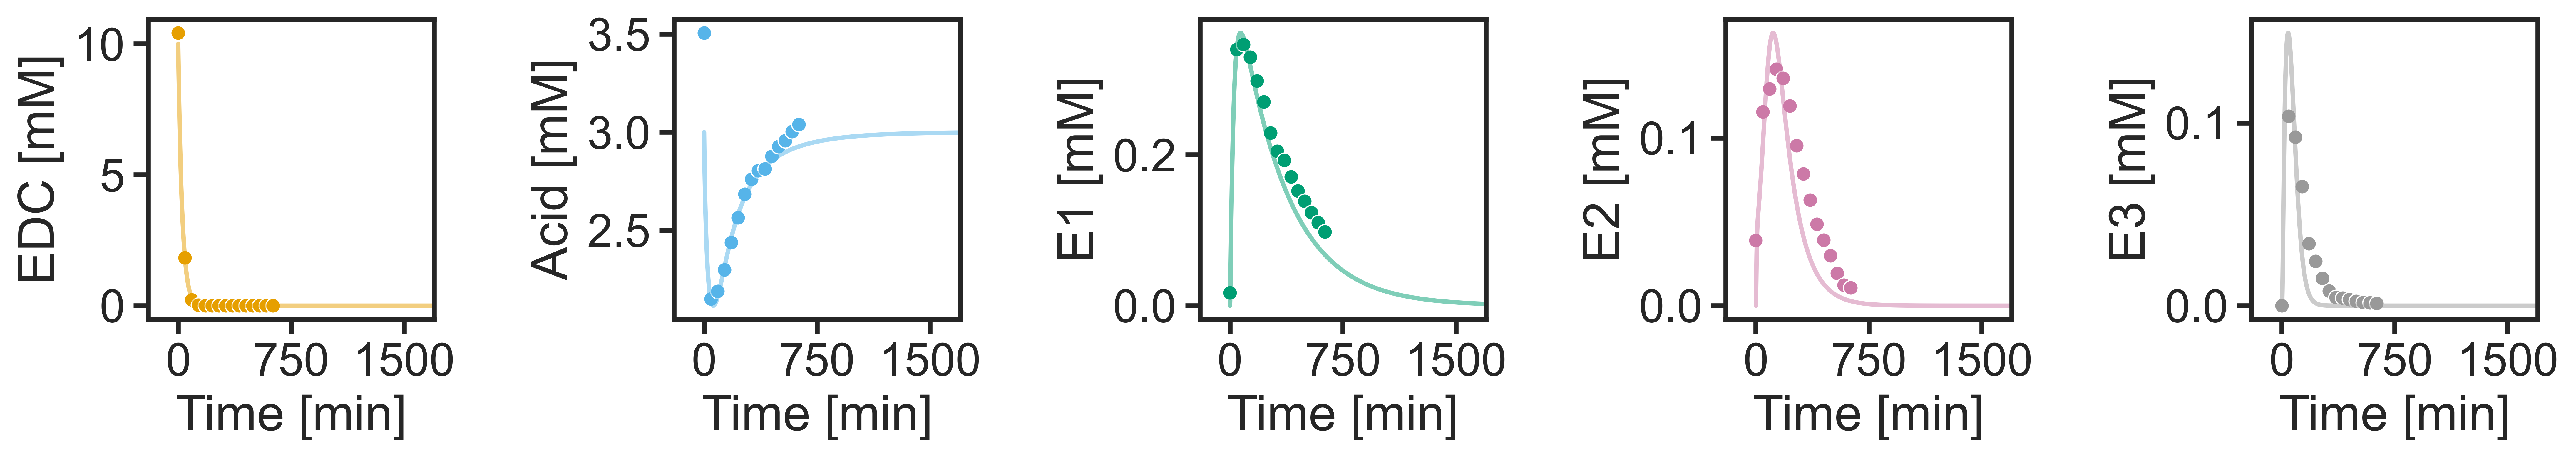

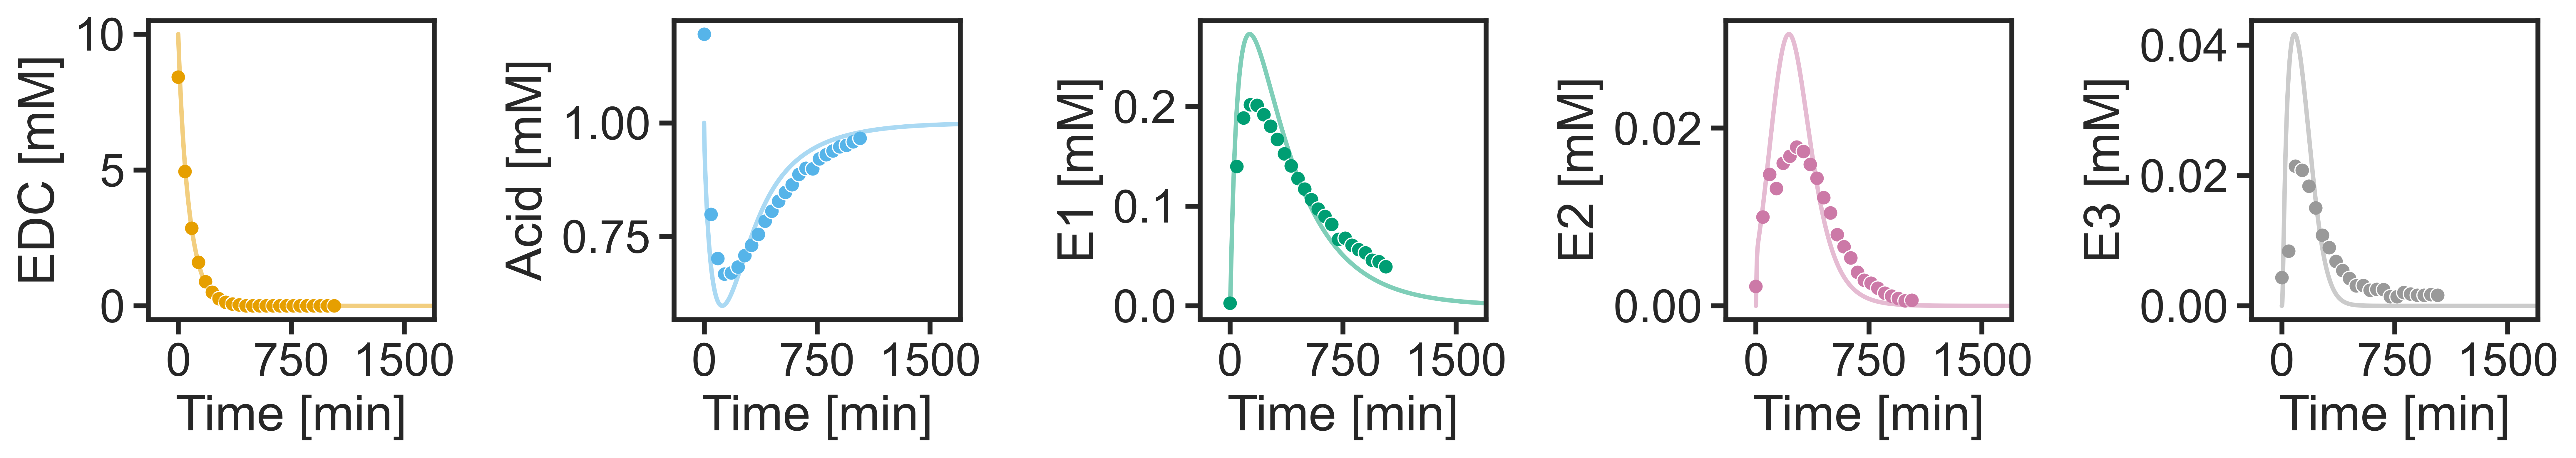

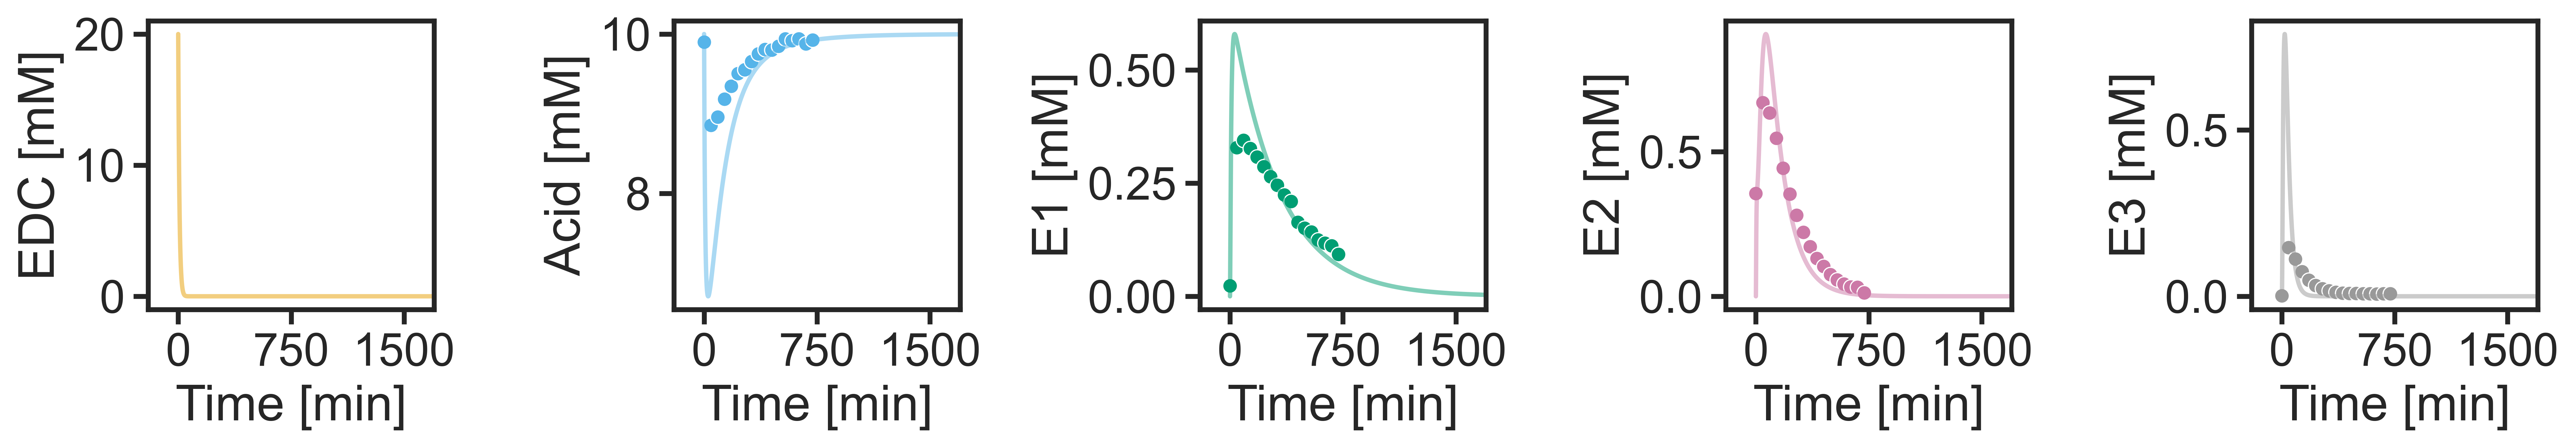

In [ ]:
y1 = cy.get_fitted_curve(ic_1, tspan = np.linspace(0, 2000, 10000), params = results1[0].values.flatten())
y2 = cy.get_fitted_curve(ic_2, tspan = np.linspace(0, 2000, 10000), params = results1[0].values.flatten())
y3 = cy.get_fitted_curve(ic_3, tspan = np.linspace(0, 2000, 10000), params = results1[0].values.flatten())


fig, ax = cy.plot_fitted(results1[1], y1)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))
fig, ax = cy.plot_fitted(results2[1], y2)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))
fig, ax = cy.plot_fitted(results3[1], y3)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [ ]:
names = ["00_10_3mM.xlsx","01_10_1mM.xlsx","02_20_10mM.xlsx"]
for i, j, n in zip([res, df2, df3], [y1, y2, y3], names):

    i.to_excel(f"experimental_{n}")
    j.to_excel(f"simulated_{n}")


/var/folders/bl/7gl6w7zj2gn6b_rq1ppnw95w0000gn/T/ipykernel_3882/1051550099.py:4: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  i.to_excel(f"experimental_{n}")
/var/folders/bl/7gl6w7zj2gn6b_rq1ppnw95w0000gn/T/ipykernel_3882/1051550099.py:5: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  j.to_excel(f"simulated_{n}")


In [ ]:
palette

[(0.9019607843137255, 0.6235294117647059, 0.0),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.8352941176470589, 0.3686274509803922, 0.0)]

In [ ]:
def plot_reagent_data(df_list, y_list):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=False, sharex=True)

    reagents = ['F', 'Ac', 'E1', 'E2', 'E3']
    #colors = sns.color_palette("Dark2",3)

    for d, y, c in zip(df_list, y_list, colors):

        for  r, ax in zip(reagents, axes):

            sns.scatterplot(data=d, x='time', y=r, ax=ax, color=c)
            sns.lineplot(data=y, x='min', y=r, ax=ax, alpha=0.5, color=c)
            ax.set(xlabel='Time [min]', ylabel=f'{r} [mM]', xticks=(0, 150, 300), xlim=(-20, 320))

    plt.tight_layout()
    return fig, axes


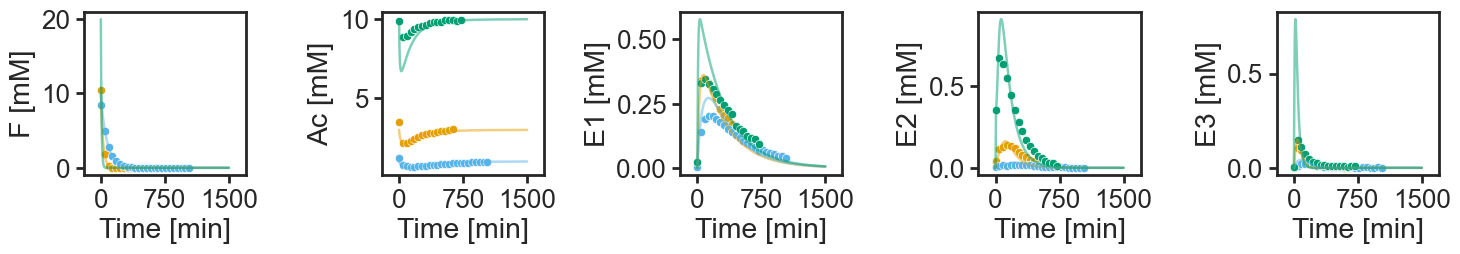

In [ ]:
fig, ax = plot_reagent_data([results1[1], results2[1], results3[1]], [y1, y2, y3])

for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [ ]:
sns.color_palette("Dark2",10)

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4),
 (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]